## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. Make sure you fill in any place that says `# BEGIN SOLUTION #END CODE HERE` searching for the missing parts (usually denoted with `...`). After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run" (denoted by a play symbol). Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). 

 **What you need to remember:**

- Run your cells using SHIFT+ENTER (or "Run cell")
- Write code in the designated areas using Python 3 only
- Do not modify the code outside of the designated areas
- In some cases you will also need to explain the results. There will also be designated areas for that. 

Fill in your **NAME** and **AEM** below:

In [1]:
NAME = ""
AEM = ""

---

# Assignment 2 - Decision Trees #

Welcome to your second assignment. This exercise gives you an introduction to [scikit-learn](https://scikit-learn.org/stable/). A simple but efficient machine learning library in Python. It also gives you a wide understanding on how decision trees work. 

After this assignment you will:
- Be able to use the scikit-learn library and train your own model from scratch.
- Be able to train and understand decision trees.

In [2]:
# Always run this cell
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# USE THIS RANDOM VARIABLE TO PRODUCE THE SAME RESULTS
RANDOM_VARIABLE = 42

## 1. Scikit-Learn and Decision Trees ##

You are going to use the scikit-learn library to train a model for detecting breast cancer using the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) by training a model using [decision trees](https://scikit-learn.org/stable/modules/tree.html).

**1.1** Load the breast cancer dataset using the scikit learn library. From variable *cdata*, you should export the *X* and *y*, from the *data* and *target* variables of the variable *cdata*, respectively, and the feature names and target names from the variables *feature_names* and *target_names*, respectively. Convert the latter two (feature names and target names) into lists. Thus, X and y should be numpy arrays, and feature_names and target_names should be lists. Then split the dataset into train and test set using the appropriate function. Use 33% of the dataset as the test set. Define as X the attributes and as y the target values. Do not forget to set the random_state parameter as the *RANDOM_VARIABLE* defined above. Use this variable for all the random_state parameters in this assignment.

In [3]:
cdata = load_breast_cancer(as_frame=True)

# BEGIN SOLUTION
X = cdata.data.values
y = cdata.target.values
feature_names = list(cdata.data.columns)
target_names = list(cdata.target_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_VARIABLE)

# END CODE HERE

In [4]:
print("Type of X: {}".format(type(X)))
print("Type of y: {}".format(type(y)))
print("Type of feature_names: {}".format(type(feature_names)))
print("Type of target_names: {}".format(type(target_names)))
print("Size of train set: {}".format(len(y_train)))
print("Size of test set: {}".format(len(y_test)))
print("Unique classes: {}".format(len(set(y_test))))

Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>
Type of feature_names: <class 'list'>
Type of target_names: <class 'list'>
Size of train set: 381
Size of test set: 188
Unique classes: 2


**Expected output**:  

```
Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>
Type of feature_names: <class 'list'>
Type of target_names: <class 'list'>
Size of train set: 381
Size of test set: 188
Unique classes: 2
```



**1.2** Train two DecisionTree classifiers and report the F1 score. Use the information gain for the one classifier and the Gini impurity for the other, set the *max_depth* to 3, and do not forget to use the *RANDOM_VARIABLE*, as it is crucial for the following part.

In [5]:
# BEGIN SOLUTION
classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=RANDOM_VARIABLE)
classifier_igain = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=RANDOM_VARIABLE)

# Train the model
classifier_gini = classifier_gini.fit(X_train, y_train)
classifier_igain = classifier_igain.fit(X_train, y_train)

# Perform predictions
prediction_gini = classifier_gini.predict(X_test)
prediction_igain = classifier_igain.predict(X_test)

# Evaluate using f1_score
f_measure_gini = f1_score(y_test, prediction_gini)
f_measure_igain = f1_score(y_test, prediction_igain)

# END CODE HERE

In [6]:
print("F-Measure Gini: {}".format(f_measure_gini))
print("F-Measure Information Gain: {}".format(f_measure_igain))

F-Measure Gini: 0.9663865546218487
F-Measure Information Gain: 0.979591836734694


**Expected output**:

```
F-Measure Gini: 0.9663865546218487
F-Measure Information Gain: 0.979591836734694
```

**1.3** In this part, you are going to explore one of the trained decision trees visually. We will use the *classifier_igain* and the function *export_graphviz* to plot the decision tree. You should fill in the missing parts of the functions parameters, which correspond to the decision tree model, the feature names and the target names.


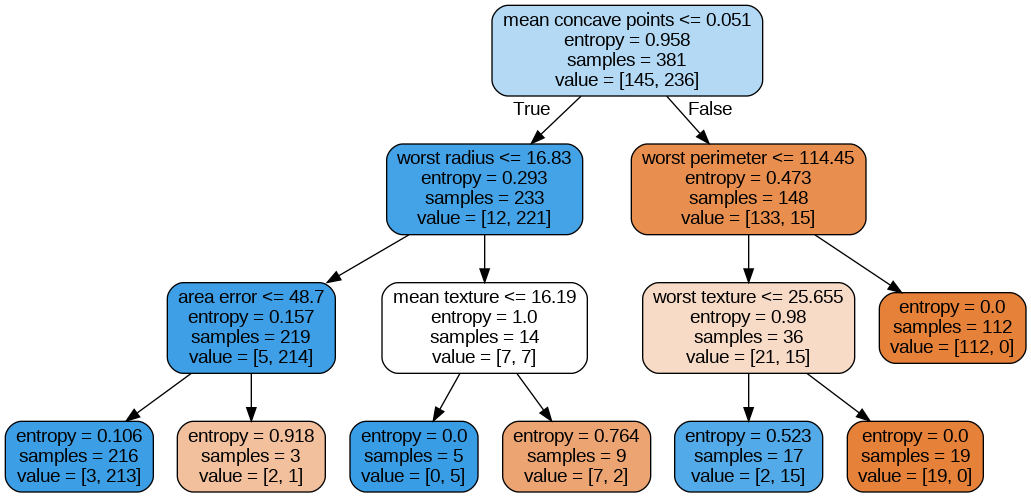

In [7]:
# Let's see how our tree looks
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call

# BEGIN SOLUTION
export_graphviz(
        classifier_igain, # The decision tree to be exported to GraphViz
        out_file="dtree.dot", # Name of the output file
        feature_names=feature_names, # Names of each of the features
        rounded=True, # Draw node boxes with rounded corners
        filled=True # Paint nodes to indicate majority class for classification
    )
# END CODE HERE

call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=96'])
Image(filename = 'dtree.png')

**1.4** Now, we will examine two random instances (7th and 136th). Thus, we are presenting the decision tree's predictions for these instances, and the ground truth values. Moreover, for each instance, we print the feature values. However, as we can see from the plot above, only 6 features out of the 30 are being used by the tree. Thus, in order to print less information, we will use the *feature_importances_* variable of our tree to check which features has 0 importance to skip them.

In [8]:
instance_a = 7
instance_b = 136
for instance in [instance_a, instance_b]:
  print(str(instance)+ 'th instance a was classified as: ' +target_names[prediction_igain[instance]] +' while the ground truth was: ' + target_names[y_test[instance]])
  # BEGIN SOLUTION
  for idf, feature_name in enumerate(feature_names):
    if classifier_igain.feature_importances_[idf] != 0:
      print('\t'+feature_name+": "+str(X_test[instance][idf]))
  # END CODE HERE
  print('\n')

7th instance a was classified as: malignant while the ground truth was: malignant
	mean texture: 15.05
	mean concave points: 0.07953
	area error: 61.1
	worst radius: 20.01
	worst texture: 19.52
	worst perimeter: 134.9


136th instance a was classified as: malignant while the ground truth was: benign
	mean texture: 18.89
	mean concave points: 0.05381
	area error: 19.29
	worst radius: 14.8
	worst texture: 27.2
	worst perimeter: 97.33


**Expected output**:

```
7th instance a was classified as: malignant while the ground truth was: malignant
	mean texture: 15.05
	mean concave points: 0.07953
	area error: 61.1
	worst radius: 20.01
	worst texture: 19.52
	worst perimeter: 134.9


136th instance a was classified as: malignant while the ground truth was: benign
	mean texture: 18.89
	mean concave points: 0.05381
	area error: 19.29
	worst radius: 14.8
	worst texture: 27.2
	worst perimeter: 97.33
```



**1.6** Based on the aforementioned information, and the plotted decision tree, identify one feature value that if changed in each instance, the predicted class will change as well. Specifically, you should find a feature value change that will be small. Answer in the following cell, either with code, or/and writing a small paragraph explaining the feature, the change and why the decision will change.

In [9]:
# BEGIN SOLUTION

# Identify the most important features
important_features = [feature_names[i] for i, importance in enumerate(classifier_igain.feature_importances_) if importance > 0]
print("Important features: ", important_features)
selected_feature = important_features[0] # Select one
print("Selected feature:", selected_feature)
current_value_a = X_test[instance_a][feature_names.index(selected_feature)] # current feature value for the instances
current_value_b = X_test[instance_b][feature_names.index(selected_feature)] # current feature value for the instances
print("Current value for instance", instance_a, ":", current_value_a)
print("Current value for instance", instance_b, ":", current_value_b)

# END CODE HERE

Important features:  ['mean texture', 'mean concave points', 'area error', 'worst radius', 'worst texture', 'worst perimeter']
Selected feature: mean texture
Current value for instance 7 : 15.05
Current value for instance 136 : 18.89


or/and

YOUR ANSWER HERE


Studying the decision tree and feature importance analysis and wanting to draw some conclusions about the feature and the reason for the decision change, we define the selected feature as the mean texture.
Regarding the 7th instance, the current texture value is 15.05. Now, to study the possible change in the predicted class, we introduce an assumed increase in the current price and it becomes 16.2. This small change will result in another class. More specifically, while our case would initially have been predicted as benign, it will now be predicted as malignant, which highlights the importance of the change in this characteristic.

**1.7** Train multiple classifiers by modifying the max_depth within the range from 1 to 8 and save the f1 scores to the corresponding list of the *fscores* dictionary (one list for training set and one for test set). Before appending the scores to the corresponding list, multiply them by 100, and round the values to 2 decimals.

In [10]:
# BEGIN SOLUTION
depth = range(1, 8)
fscores = {}
fscores['train'] = []
fscores['test'] = []

for d in depth:
    # Define and train the classifier
    classifier = DecisionTreeClassifier(criterion='gini', max_depth=d, random_state=RANDOM_VARIABLE)
    classifier = classifier.fit(X_train, y_train)

    # Make predictions on training and test sets
    train_predictions = classifier.predict(X_train)
    test_predictions = classifier.predict(X_test)

    # Compute F1 scores and append to the corresponding lists
    f1_train = round(f1_score(y_train, train_predictions) * 100, 2)
    f1_test = round(f1_score(y_test, test_predictions) * 100, 2)
    fscores['train'].append(f1_train)
    fscores['test'].append(f1_test)
# END CODE HERE

In [11]:
print("Fscores Train: {}".format(fscores['train']))
print("Fscores Test:  {}".format(fscores['test']))

Fscores Train: [94.24, 95.46, 97.65, 99.15, 99.37, 99.58, 100.0]
Fscores Test:  [91.14, 93.97, 96.64, 94.12, 95.4, 95.04, 93.72]


**Expected output**:  
```
Fscores Train: [94.24, 95.46, 97.65, 99.15, 99.37, 99.58, 100.0]
Fscores Test:  [91.14, 93.97, 96.64, 94.12, 95.4, 95.04, 93.72]
```

**1.8** Compare the results from the train set with the results from the test set. What do you notice? How are you going to choose the max_depth of your model?

YOUR ANSWER HERE

## 2.0 Pipelines ##

In this part of the exercise you are going to build a pipeline from scratch for a classification problem. Load the **income.csv** file and train a DecisionTree model that will predict the *income* variable. This dataset is a modification of the original Adult Income dataset found [here](http://archive.ics.uci.edu/ml/datasets/Adult). Report the f1-score and accuracy score of the test set found in **income_test.csv**. Your pipeline should be able to handle missing values and categorical features (scikit-learn's decision trees do not handle categorical values). You can preprocess the dataset as you like in order to achieve higher scores.  

**2.1** Load the train and test set variables from the files **income.csv** and **income_test.csv**

In [38]:
# BEGIN SOLUTION
train_set = pd.read_csv('income.csv')
train_set.info()
X_train = train_set.drop('income',axis=1)
y_train = train_set['income']

test_set = pd.read_csv('income_test.csv')
test_set.info() 
X_test = test_set.drop('income',axis=1)
y_test = test_set['income']
# End CODE HERE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15315 entries, 0 to 15314
Data columns (total 14 columns):
 #   Column          Non-Nul

**2.2** Check if there are any features with missing values in the data and report them. Check and report the numerical and categorical data, as well.

In [14]:
# BEGIN SOLUTION

categorical_features = [X_train.columns[i] for i in range(len(X_train.columns)) 
          if  X_train.dtypes[i] == 'object']
categorical_missing = X_train[categorical_features].isnull().sum()
print("\nCategorical Features with Missing Values:")
print(categorical_missing[categorical_missing > 0])

numerical_features = [X_train.columns[i] for i in range(len(X_train.columns))
                   if X_train.columns[i] not in categorical_features]
numerical_missing = X_train[numerical_features].isnull().sum()
print("Numerical Features with Missing Values:")
print(numerical_missing[numerical_missing > 0])

# End CODE HERE


Categorical Features with Missing Values:
workclass     1836
occupation    1843
dtype: int64
Numerical Features with Missing Values:
Series([], dtype: int64)


YOUR ANSWER HERE

**2.3** Create your pipeline. An acceptable pipeline, should include both numerical and categorical handling.

In [15]:
# BEGIN SOLUTION
from sklearn.preprocessing import StandardScaler
# your pipeline!
# Define the preprocessing steps for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

# Define the preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

# Combine the preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),  # Apply the numerical preprocessing steps to numerical features
        ('categorical', categorical_transformer, categorical_features)  # Apply the categorical preprocessing steps to categorical features
    ])

# Create the pipeline by combining the preprocessor and the decision tree classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=RANDOM_VARIABLE))
])
# train the pipeline
clf.fit(X_train, y_train)
# End CODE HERE

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education_num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

**2.4** Evaluate the pipeline's performance, without tuning!

In [37]:
# BEGIN SOLUTION
# perform the prediction to the test set
y_predict = clf.predict(X_test)

# End CODE HERE
print("Model score Accuracy: %.3f" % accuracy_score(y_test,y_predict))
print("Model score F1 Weighted: %.3f" % f1_score(y_test,y_predict,average='weighted'))

Model score Accuracy: 0.797
Model score F1 Weighted: 0.799


**2.5** Perform a gooood grid search to find the best parameters for your pipeline. Both GridSearchCV and RandomizedSearchCV are acceptable

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [3, 5, 7, 8, 9, 10, 15],
    'classifier__min_samples_leaf': [5, 10, 15, 20],
    'classifier__max_leaf_nodes': [32, 34, 36, 38],
    'preprocessor__numerical__imputer__strategy': ['mean', 'median', 'most_frequent']
}


grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5, n_jobs=3, verbose=2)
grid_search.fit(X_train, y_train)

print("Best params:")
print(grid_search.best_params_)

Fitting 5 folds for each of 1344 candidates, totalling 6720 fits
Best params:
{'classifier__criterion': 'gini', 'classifier__max_depth': 15, 'classifier__max_leaf_nodes': 38, 'classifier__min_samples_leaf': 10, 'classifier__splitter': 'best', 'preprocessor__numerical__imputer__strategy': 'mean'}


**2.6** Evaluate the best model's performance.

In [22]:
# BEGIN SOLUTION
# perform the prediction to the test set
y_predict =  grid_search.predict(X_test)
# End CODE HERE
print("Model score Accuracy: %.3f" % accuracy_score(y_test,y_predict))
print("Model score F1 Weighted: %.3f" % f1_score(y_test,y_predict,average='weighted'))

Model score Accuracy: 0.854
Model score F1 Weighted: 0.846


**2.7** Evaluate your model using at least three different evaluation metrics (note1: except accuracy and weighted f1 score, note2: do not use more than once a variation of f1).

In [42]:
# BEGIN SOLUTION
from sklearn.metrics import precision_score,f1_score,recall_score

metric1 = recall_score(y_test,y_predict,pos_label="<=50K")
metric2 = f1_score(y_test,y_predict, average="weighted")
metric3 = precision_score(y_test,y_predict,pos_label="<=50K")

#END CODE HERE

In [43]:
print("Model score Metric 1: %.3f" % metric1)
print("Model score Metric 2: %.3f" % metric2)
print("Model score Metric 3: %.3f" % metric3)

Model score Metric 1: 0.857
Model score Metric 2: 0.799
Model score Metric 3: 0.871


**2.8** Describe the process you followed to achieve the results above. Your description should include, but is not limited to the following 
- How do you handle missing values and why
- How do you handle categorical variables and why
- Any further preprocessing steps
- How do you evaluate your model and how did you choose its parameters 
- Report any additional results and comments on your approach.

You should achieve at least 85% accuracy score and 84% f1 score.

YOUR ANSWER HERE

*   Handling missing values:

Speaking for numerical features the missing values were replaced using the mean value of each feature. We managed this with the **SimpleImputer** from scikit-learn.
For categorical features the missing values were replaced by the most frequent label. This was done using the SimpleImputer as well.
We handled missing values to ensure that the model has complete data to learn from. In this way, we avoid discarding valuable information and improve the performance of the model.

*   Handling categorical variables:

The categorical variables were one-hot encoded using the **OrdinalEncoder** from scikit-learn. We did this to convert each categorical variable into multiple numerical columns, with each column representing a unique category. This transformation allows the model to effectively utilize categorical information in the dataset. Decision tree models in scikit-learn do not natively handle categorical data, so it is crucial to manage this.

*   Further preprocessing steps:

The numerical features were also standardized using the **StandardScaler** to have zero mean and unit variance. This step is important to ensure that features with different scales do not negatively influence the model's learning process.
*   Evaluating the model and choosing parameters:

The model was evaluated using several performance metrics such as accuracy, weighted F1 score, recall_score and precision score. These metrics provide insights into different aspects of the model's performance. Actually, we predicted the output (y_predict), compared it with y_test and find their matching. So, after using the abovementioned metrics, our model scored 0.797 on accuracy and 0.799 F1 score. 

Then, a grid search (GridSearchCV) was performed to find the best combination of hyperparameters for the decision tree model. The hyperparameters explored included the maximum depth of the tree, the minimum number of samples required to split a node, the maximum leaf nodes, the chosen criterion, the splitter method and the numerical imputer strategy. The best parameters were chosen based on the performance metric specified in the grid search. The accuracy with tuning was 0.854 and F1 Score with tuning was 0.846.

*    Additional results and comments:

The best model achieved high accuracy and F1 score on the test set compared with the not tuned one, indicating its good performance in predicting the income variable.

We should note here that the preprocessing steps and parameter tuning process may vary depending on the dataset and our problem's kind. 

Also, this grid search we implemented here made 6720 fits, which took about 20 minutes. That is significantly slow for this dataset. Maybe, in different problems we should improve the process.

**Bonus Question:** Did you like this assignment? Please provide your feedback.

YOUR ANSWER HERE

I really enjoyed working on this assignment! It provided an opportunity to practice and apply our knowledge in the field of decision trees, pipelines and evaluation metrics. The step-by-step instructions were helpful (as always) in guiding me through the process and I appreciated the variety of tasks involved, such as handling missing values, categorical variables and (hyper)parameter tuning.